In [1]:
import json, requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
etf_list = ['VTI','VEA', 'VWO', 'VNQ', 'XLE', 'BND', 'SCHP', 'VTEB', 'VIG']
pickle_list = []
for etf in etf_list:
    pickle_name = etf + '.pickle'
    pickle_list.append(pickle_name)

In [3]:
df_list = []
for etf in pickle_list:
    df_name = 'df_' + etf[0:2]
    df_name = pd.read_pickle(etf)
    df_list.append(df_name)

In [4]:
for df in df_list:
    df['Normed Return'] = df['close'] / df.iloc[0]['close']
    df['Allocation'] = df['Normed Return'] * (1/9)
    df['Pos'] = df['Allocation'] * 100000

In [5]:
pos_ls = []
for df in df_list:
    pos_ls.append(df['Pos'])

In [6]:
portfolio_val = pd.concat(pos_ls, axis=1)

In [7]:
portfolio_val.columns = ['vti pos', 'vea pos', 'vwo pos', 'vnq pos', 'xle pos', 'bnd pos', 'schp pos', 'vteb pos', 'vig pos']

In [8]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

In [9]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [10]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [11]:
ASR = (252**0.5) * SR
ASR

-0.0697242384516446

In [12]:
close_ls = []
for df in df_list:
    close_ls.append(df['close'])
stocks = pd.concat(close_ls,axis=1)
stocks.columns = ['VTI','VEA', 'VWO', 'VNQ', 'XLE', 'BND', 'SCHP', 'VTEB', 'VIG']

In [13]:
mean_daily_return = stocks.pct_change(1).mean()
mean_daily_return

VTI     0.000111
VEA    -0.000353
VWO    -0.000357
VNQ     0.000461
XLE    -0.000837
BND     0.000157
SCHP    0.000109
VTEB    0.000158
VIG     0.000354
dtype: float64

In [14]:
stocks.pct_change(1).corr()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
VTI,1.000000,0.846470,0.699261,0.508248,0.729797,-0.269011,-0.212829,-0.277266,0.949047
VEA,0.846470,1.000000,0.832111,0.357408,0.707659,-0.260829,-0.194870,-0.320403,0.801598
VWO,0.699261,0.832111,1.000000,0.271180,0.551098,-0.157931,-0.128659,-0.256603,0.649762
VNQ,0.508248,0.357408,0.271180,1.000000,0.254324,0.127459,0.112598,0.086710,0.558705
XLE,0.729797,0.707659,0.551098,0.254324,1.000000,-0.238995,-0.089929,-0.283731,0.681783
BND,-0.269011,-0.260829,-0.157931,0.127459,-0.238995,1.000000,0.809118,0.736961,-0.232130
SCHP,-0.212829,-0.194870,-0.128659,0.112598,-0.089929,0.809118,1.000000,0.646921,-0.191130
VTEB,-0.277266,-0.320403,-0.256603,0.086710,-0.283731,0.736961,0.646921,1.000000,-0.224292
VIG,0.949047,0.801598,0.649762,0.558705,0.681783,-0.232130,-0.191130,-0.224292,1.000000


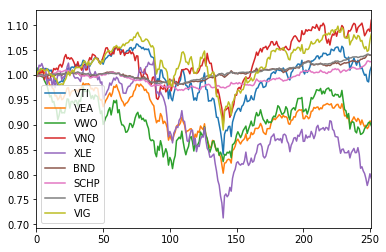

In [15]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [16]:
stock_daily_return = stocks.pct_change(1)
stock_daily_return.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008850,0.008511,0.014387,0.002383,0.004766,-0.002785,-0.001652,0.000000,0.006955
2,-0.001462,-0.005774,-0.015274,0.000000,0.015152,0.002539,0.002390,0.001377,0.001247
3,0.003417,0.001787,-0.000665,0.003629,-0.001947,-0.001266,-0.001284,-0.000589,0.004599
4,0.001459,0.006466,-0.001330,-0.001496,0.005202,-0.000888,0.000000,0.000000,-0.001049


In [23]:
log_ret = np.log(stocks/stocks.shift(1))
pickle_path = os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'data', 'log_ret.pickle'))
log_ret.to_pickle(pickle_path)
log_ret.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008811,0.008475,0.014284,0.002381,0.004754,-0.002789,-0.001653,0.000000,0.006931
2,-0.001463,-0.005791,-0.015392,0.000000,0.015038,0.002536,0.002387,0.001376,0.001246
3,0.003411,0.001785,-0.000665,0.003623,-0.001949,-0.001267,-0.001285,-0.000589,0.004588
4,0.001458,0.006445,-0.001331,-0.001497,0.005188,-0.000888,0.000000,0.000000,-0.001050


In [18]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VTI,251.0,0.000064,0.009783,-0.033202,-0.003677,0.000348,0.005139,0.046998
VEA,251.0,-0.000389,0.008513,-0.027949,-0.005548,0.000477,0.004941,0.030285
VWO,251.0,-0.000427,0.011832,-0.034406,-0.007986,0.000701,0.007754,0.035292
VNQ,251.0,0.000417,0.009416,-0.038392,-0.004561,0.000874,0.006713,0.032907
XLE,251.0,-0.000926,0.013295,-0.041297,-0.007672,0.000317,0.006867,0.060362
BND,251.0,0.000156,0.001755,-0.006426,-0.000881,0.000248,0.001401,0.005452
SCHP,251.0,0.000107,0.002032,-0.005706,-0.001203,0.000181,0.001304,0.006773
VTEB,251.0,0.000157,0.001252,-0.004124,-0.000572,0.000196,0.000983,0.003852
VIG,251.0,0.000316,0.008765,-0.028690,-0.003359,0.000984,0.004631,0.040440


In [19]:
log_ret.mean() * 252

VTI     0.016020
VEA    -0.097941
VWO    -0.107560
VNQ     0.105125
XLE    -0.233245
BND     0.039260
SCHP    0.026910
VTEB    0.039498
VIG     0.079675
dtype: float64

In [20]:
log_ret.cov() * 252

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
VTI,0.024119,0.017771,0.020408,0.011779,0.023883,-0.001164,-0.001069,-0.000854,0.020510
VEA,0.017771,0.018263,0.021132,0.007214,0.020193,-0.000981,-0.000850,-0.000859,0.015075
VWO,0.020408,0.021132,0.035279,0.007601,0.021874,-0.000827,-0.000780,-0.000955,0.016988
VNQ,0.011779,0.007214,0.007601,0.022341,0.007987,0.000531,0.000541,0.000260,0.011616
XLE,0.023883,0.020193,0.021874,0.007987,0.044546,-0.001401,-0.000612,-0.001185,0.019992
BND,-0.001164,-0.000981,-0.000827,0.000531,-0.001401,0.000776,0.000727,0.000408,-0.000899
SCHP,-0.001069,-0.000850,-0.000780,0.000541,-0.000612,0.000727,0.001041,0.000415,-0.000859
VTEB,-0.000854,-0.000859,-0.000955,0.000260,-0.001185,0.000408,0.000415,0.000395,-0.000618
VIG,0.020510,0.015075,0.016988,0.011616,0.019992,-0.000899,-0.000859,-0.000618,0.019362


In [21]:
weights = np.array(np.random.random(len(etf_list)))
weights = weights / np.sum(weights)

In [22]:
exp_ret = np.sum(log_ret.mean() * weights) * 252
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
SR = exp_ret / exp_vol
SR

-0.2597073511951277